# Importing the main libraries

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset

In [275]:
dataset = pd.read_csv("diabetes.csv")
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Preliminary Viewing of Data

## Basic overview

In [148]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Checking the categorical data 

In [149]:
dataset["Insulin"].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

## Plotting of the histograms

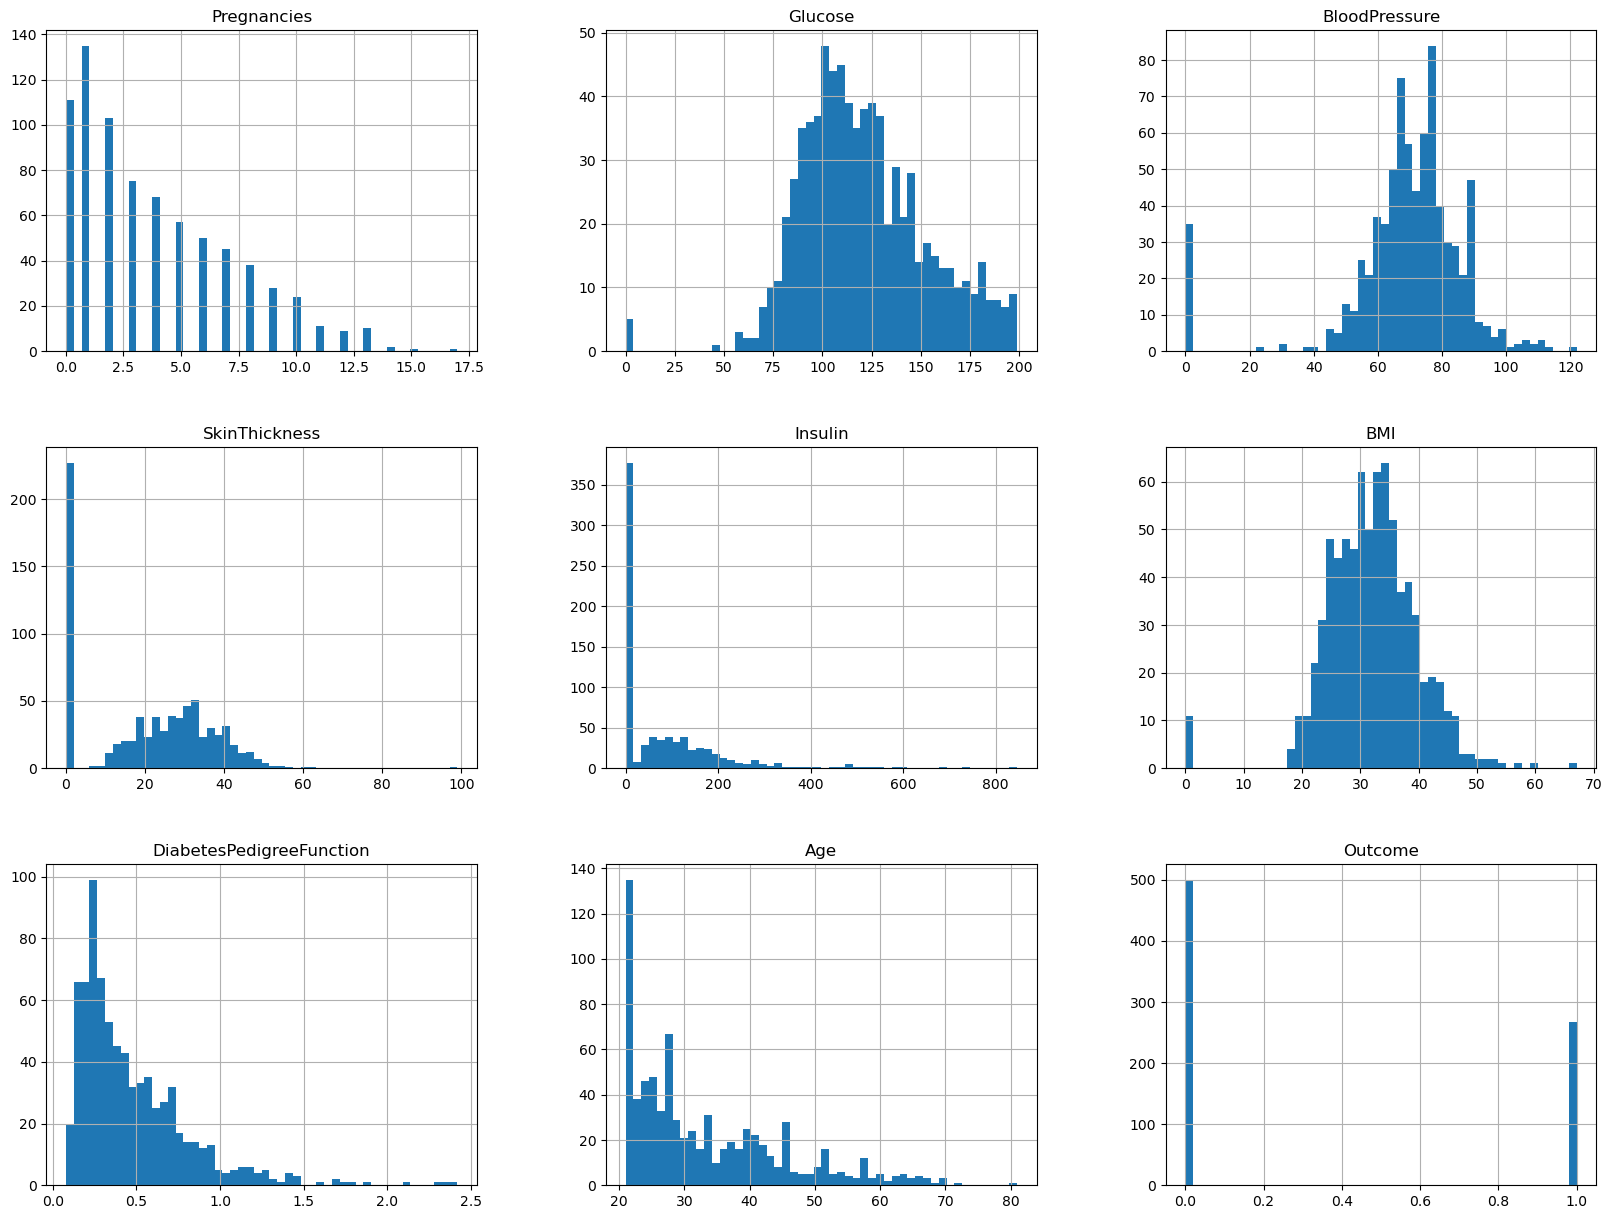

In [150]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [151]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Finding correlation with target variable

In [152]:
correlation = dataset.corr()
correlation["Outcome"].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

# Cleaning and Processing the data

## Removing Outliers 

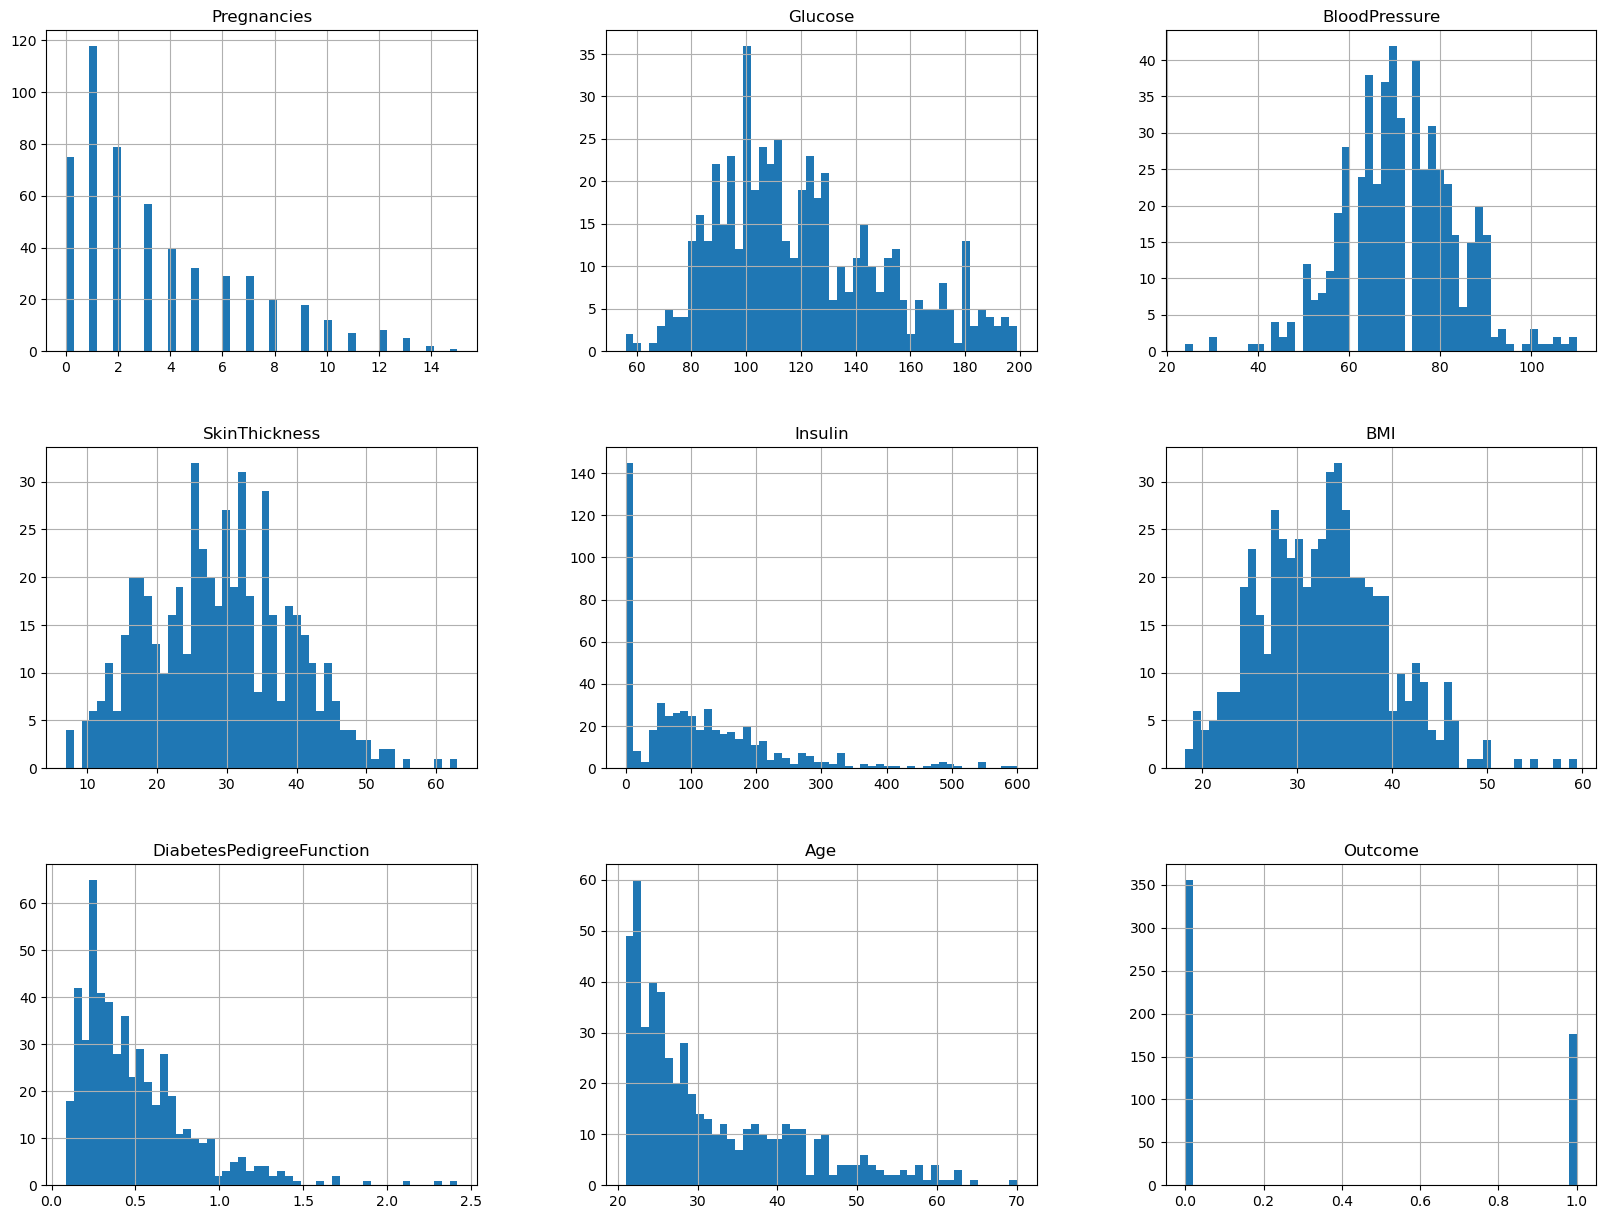

In [280]:
df1 = dataset[dataset["SkinThickness"]<=65]
df2 = df1[df1["BMI"]<=62]
df3 = df2[df2["Pregnancies"]<=16]
df4 = df3[df3["Insulin"]<=650]
df5 = df4[df4["Age"]<=75]
df5.hist(bins=50, figsize=(20,15))
plt.show()


## Dealing with the categories with 0 values

In [281]:
dataset = df4

In [282]:
dataset.loc[dataset["Glucose"] == 0,'Glucose'] = np.nan
dataset.loc[dataset['BloodPressure'] == 0, 'BloodPressure'] = np.nan
dataset.loc[dataset["SkinThickness"] == 0,'SkinThickness'] = np.nan
dataset.loc[dataset["BMI"] == 0,'BMI'] = np.nan
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               533 non-null    int64  
 1   Glucose                   528 non-null    float64
 2   BloodPressure             531 non-null    float64
 3   SkinThickness             533 non-null    float64
 4   Insulin                   533 non-null    int64  
 5   BMI                       533 non-null    float64
 6   DiabetesPedigreeFunction  533 non-null    float64
 7   Age                       533 non-null    int64  
 8   Outcome                   533 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 41.6 KB
None


## Separating into target variable and splitting the dataset

In [283]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [284]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#[we get higher accuracy score with this split]

In [294]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for i, (train_index, test_index) in enumerate(sss.split(x, y)):
    train = train_index
    test = test_index

In [295]:
i1 = []
for i in train:
    i1.append(i)
    
i2 = []
for i in test:
    i2.append(i)

x_train = x.iloc[i1, :]
x_test = x.iloc[i2, :]


In [296]:
y_train = y.iloc[i1]
y_test = y.iloc[i2]

## Encoding and Scaling the data 

In [297]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pl = Pipeline(
     [('si', SimpleImputer(strategy='median')),
      ('ss', StandardScaler())],
     )
x_train = pl.fit_transform(x_train)


In [298]:
print(pd.DataFrame(x_train))

            0         1         2         3         4         5         6  \
0   -0.770524 -0.243731 -0.429269  0.703559  0.772454  0.785470 -0.617927   
1   -1.075300 -0.762878  0.878102 -1.397956 -0.234154 -1.127012 -0.589164   
2   -1.075300 -0.243731  0.714681  0.503415  1.510054  1.689822 -0.968837   
3    1.058129  1.248816 -1.409797  0.303270  0.555512 -0.341263  0.242089   
4    1.058129  0.470096  0.224417 -0.297163  0.208406 -1.008408  0.411792   
..        ...       ...       ...       ...       ...       ...       ...   
421 -1.075300  1.897749  0.551259  3.405507 -0.841590  3.943288  5.511489   
422 -0.160973 -0.730431 -0.756111 -0.997668 -0.320931 -1.631077 -0.646690   
423  0.143803  0.729669 -1.082954 -0.097018  0.251795 -0.489518 -0.623680   
424  0.448578  0.729669  0.878102 -0.297163  1.510054 -0.118882 -0.149089   
425 -0.160973 -0.211284 -0.429269  1.003775  0.251795  0.785470 -1.017734   

            7  
0   -1.020805  
1   -0.926229  
2   -0.453346  
3    0.6815

# Building the model

In [299]:
from sklearn.metrics import accuracy_score, confusion_matrix
x_test = pl.transform(x_test)

## Decision Tree

In [331]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(max_features = 6, min_samples_split = 6)
classifier1.fit(x_train, y_train)

y_pred = classifier1.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7757009345794392
[[66  6]
 [18 17]]


## Logistic Regression

In [329]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression()
classifier2.fit(x_train, y_train)

y_pred = classifier2.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8037383177570093
[[67  5]
 [16 19]]


## Random Forest 

In [342]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 50) 
classifier3.fit(x_train, y_train)
classifier3.fit(x_train, y_train)

y_pred = classifier3.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8411214953271028
[[70  2]
 [15 20]]


## Naive Bayes

In [223]:
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(x_train, y_train)

y_pred = classifier4.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7757009345794392
[[62 10]
 [14 21]]


## K-NN Classifier

In [363]:
from sklearn.neighbors import KNeighborsClassifier
classifier5 = KNeighborsClassifier(n_neighbors = 5) #grid search was not used, but I experimented with a few values for n_neighbors. This gave the best result
classifier5.fit(x_train, y_train)

y_pred = classifier5.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7570093457943925
[[65  7]
 [19 16]]


D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Support Vector Classifier (RBF model) 

In [344]:
from sklearn.svm import SVC
classifier6 = SVC(kernel = 'sigmoid') #linear model was tried, results were lower
classifier6.fit(x_train, y_train)

y_pred = classifier6.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Gave consistent correct score

0.8317757009345794
[[66  6]
 [12 23]]


## Stacking Model

In [226]:
from sklearn.ensemble import StackingClassifier
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier(n_neighbors = 9)))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC(kernel = 'sigmoid')))
level0.append(('bayes', GaussianNB()))
level0.append(('random', RandomForestClassifier(n_estimators = 50)))

level1 = LogisticRegression()

model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.822429906542056
[[68  4]
 [15 20]]


## Voting Classifier

In [229]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
 estimators=[('lr', LogisticRegression()), ('svc', SVC(kernel = 'sigmoid', probability = True)), ('rf', RandomForestClassifier(n_estimators = 50))],
 voting='soft')
voting_clf.fit(x_train, y_train)
y_pred = voting_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#If we remove the outliers in age for beyond age>=65, this will go upto 83%, but others will decrease

0.8317757009345794
[[68  4]
 [14 21]]


In [362]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
 estimators=[('lr', LogisticRegression()), ('svc', SVC(kernel = 'sigmoid')), ('rf', RandomForestClassifier(n_estimators = 50)), ('dt', DecisionTreeClassifier()), ('knn', KNeighborsClassifier(n_neighbors = 9))],
 voting='hard')
voting_clf.fit(x_train, y_train)
y_pred = voting_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8317757009345794
[[69  3]
 [15 20]]


D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Adaboost

In [354]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_features = 6, min_samples_split = 6, max_depth = 1), n_estimators=200,
 algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(x_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         max_features=6,
                                                         min_samples_split=6),
                   learning_rate=0.5, n_estimators=200)

In [355]:
y_pred = ada_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8037383177570093
[[66  6]
 [15 20]]


# Hyperparameter tuning

## Random Forest

In [303]:
from sklearn.model_selection import GridSearchCV

param_dist = { 
    "max_features": [2, 4, 6, 8], 
    "min_samples_split": [2, 4, 6, 8], 
    "bootstrap": [True, False],
    "n_estimators": [10, 20, 30, 40, 50]} 

clf = RandomForestClassifier()

random_search = GridSearchCV(clf, param_dist, cv=5, scoring = 'accuracy') 
random_search.fit(x_train, y_train)
print(random_search.best_params_)

{'bootstrap': True, 'max_features': 4, 'min_samples_split': 8, 'n_estimators': 40}


In [308]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 40, min_samples_split = 8, max_features = 4, bootstrap = True) #grid search was not used, but I experimented with a few values for n_neighbors. This gave the best result
classifier3.fit(x_train, y_train)
classifier3.fit(x_train, y_train)

y_pred = classifier3.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#using just n_estimators = 50 gives the same result

0.8317757009345794
[[68  4]
 [14 21]]


## Logistic Regression

In [315]:
param_dist = { 
    "penalty": ['l1', 'l2', 'elasticnet'], 
    "tol": [0.0001, 0.0005, 0.0007, 0.0003], 
    "C": [ 0.25, 0.5, 0.75, 1, 1.25]} 

clf = LogisticRegression()

grid_search = GridSearchCV(clf, param_dist, cv=5, scoring = 'accuracy') 
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'C': 0.25, 'penalty': 'l2', 'tol': 0.0001}


D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'n

In [321]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(C= 0.25)
classifier2.fit(x_train, y_train)

y_pred = classifier2.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8037383177570093
[[67  5]
 [16 19]]


## Decision Tree

In [326]:
from sklearn.model_selection import GridSearchCV

param_dist = { 
    "max_features": [2, 4, 6, 8], 
    "min_samples_split": [2, 4, 6, 8]
     } 

clf = DecisionTreeClassifier()

random_search = GridSearchCV(clf, param_dist, cv=5, scoring = 'accuracy') 
random_search.fit(x_train, y_train)
print(random_search.best_params_)

{'max_features': 6, 'min_samples_split': 6}


In [336]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(max_features = 6, min_samples_split = 6)
classifier1.fit(x_train, y_train)

y_pred = classifier1.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Better than original

0.794392523364486
[[64  8]
 [14 21]]
